In [2]:
import pandas as pd
import numpy as np
from scipy import linalg
import sys
import os
from qkids import Week
from qkids.DatabasePool import get_schedule_connection
sys.path.append("..")
from schedule.DataFarm import DataFarm
import matplotlib.pyplot as plt
from qkids import Week

# get historical actual data

In [3]:
datafarm = DataFarm()
historical_data = datafarm.run()

In [4]:
week_data = historical_data.sum().sort_index()
week_data = week_data     # 2018年以来 没周人数


vacation_week_weight = {'201826':0.5,
                            '201827':0.6,
                            '201828':0.7,
                            '201829':0.8,
                            '201830':0.9,
                            '201831':0.9,
                            '201832':0.9,
                            '201833':1,
                            '201834':1,
                            '201835':1,
                            '201904': 0.4,
                            '201905': 0.4,
                            '201906': -0.1,
                            '201907': 0.5,
                            '201908': 0.5,  # 虽然没有全天 但是暑假券还能用
                            '201909': 0.5   # 虽然没有全天 但是暑假券还能用
                            }
whole_day_week = pd.Series(0, index = week_data.index, dtype='float')   # 寒暑假课
for i, value in vacation_week_weight.items():
    whole_day_week[i] = value

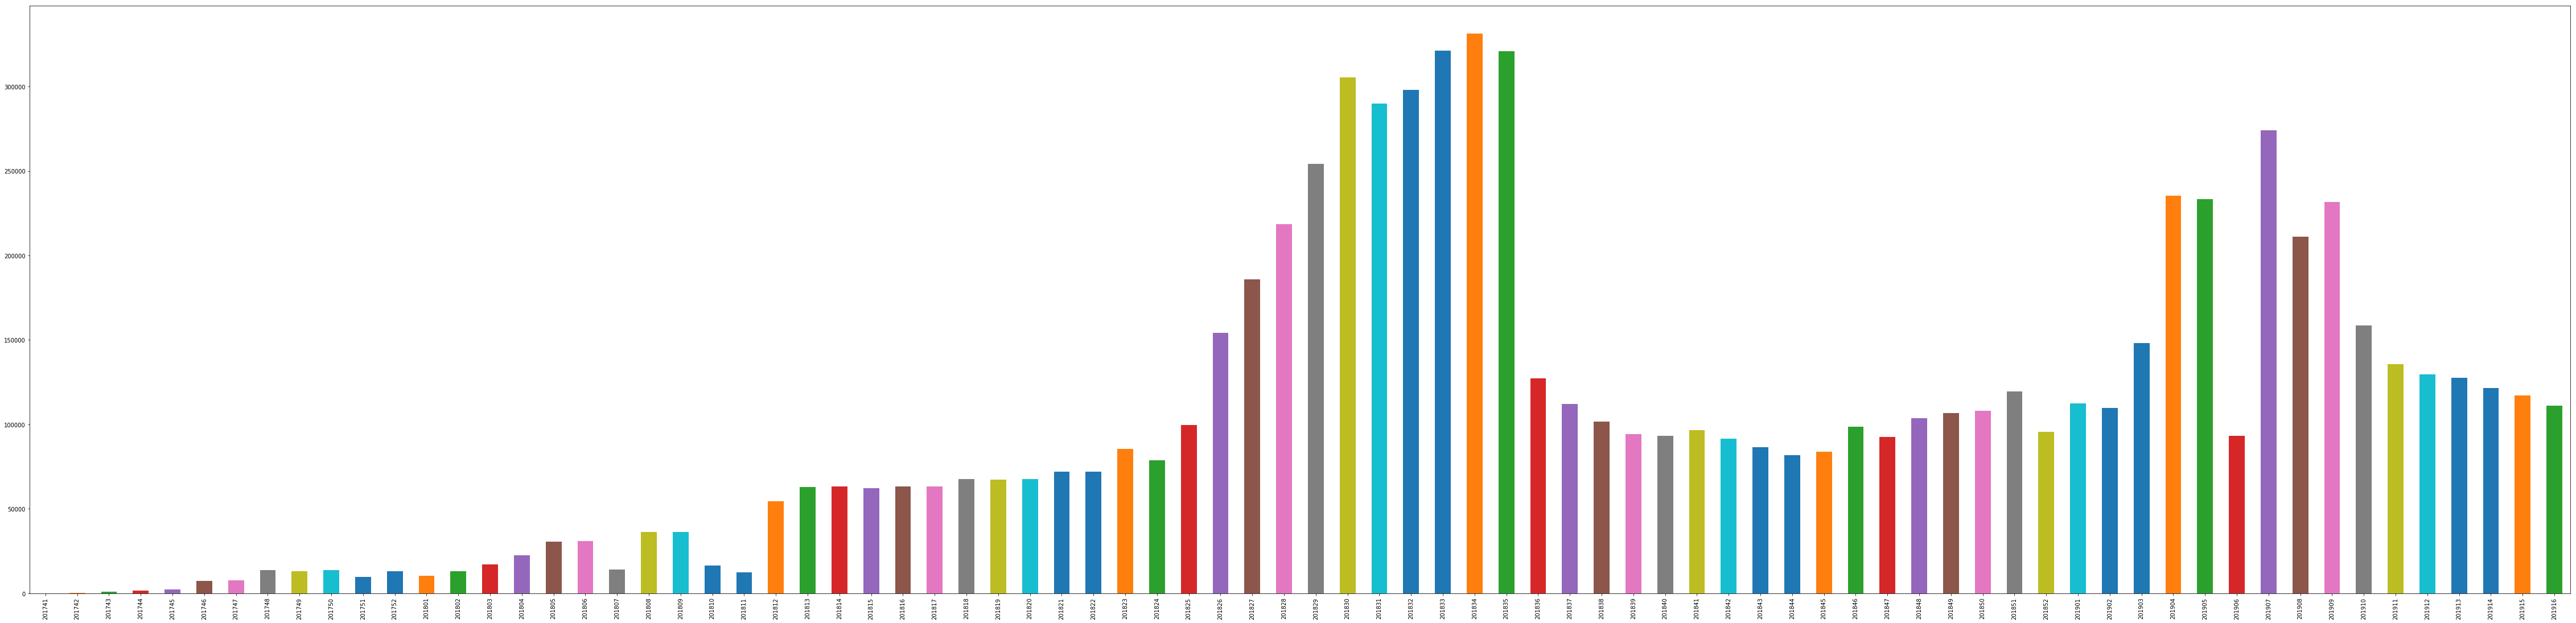

In [34]:
# 每周数据
plt.figure(0)
week_data.plot(figsize=(80, 19), label='111', kind='bar')

###  $y_i = c_1e^{-x_i} + c_2x_i + c_3z_i$

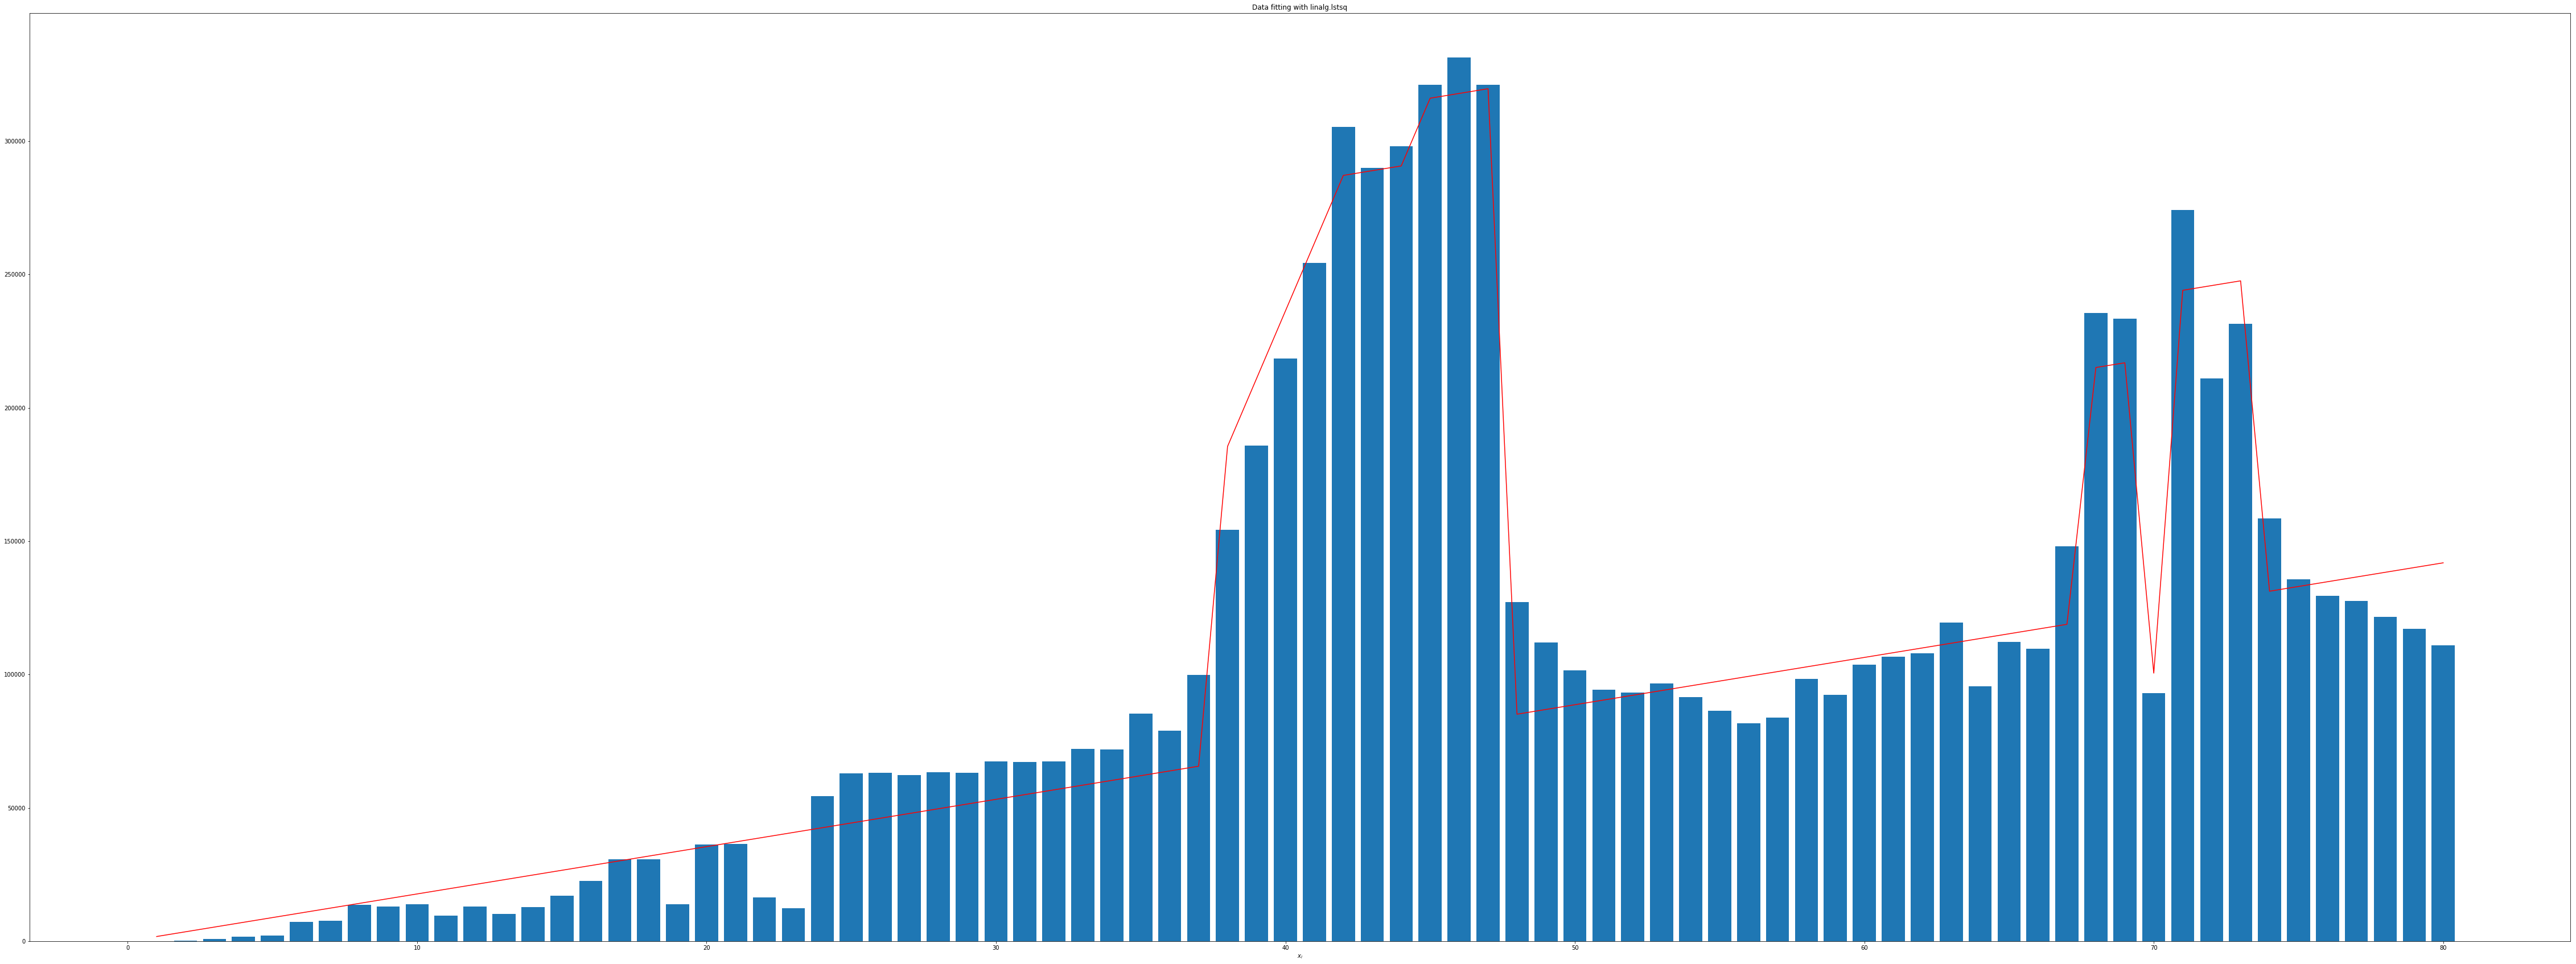

In [8]:
y = week_data.values
x = np.r_[1:len(y)+1]
z = whole_day_week.values
# A = np.c_[np.exp(-x)[:, np.newaxis], x[:, np.newaxis],  z[:, np.newaxis]]
A = np.c_[x[:, np.newaxis],  z[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, y)
xi2 = np.r_[1:len(y):10j]
yi2 = c[0]*x + c[1]*z

plt.figure(1, figsize=(80,30))
plt.bar(x, y)
plt.plot(x,yi2, 'r')
# plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

#### 减去寒暑假影响后 使用exponentially weighted windows

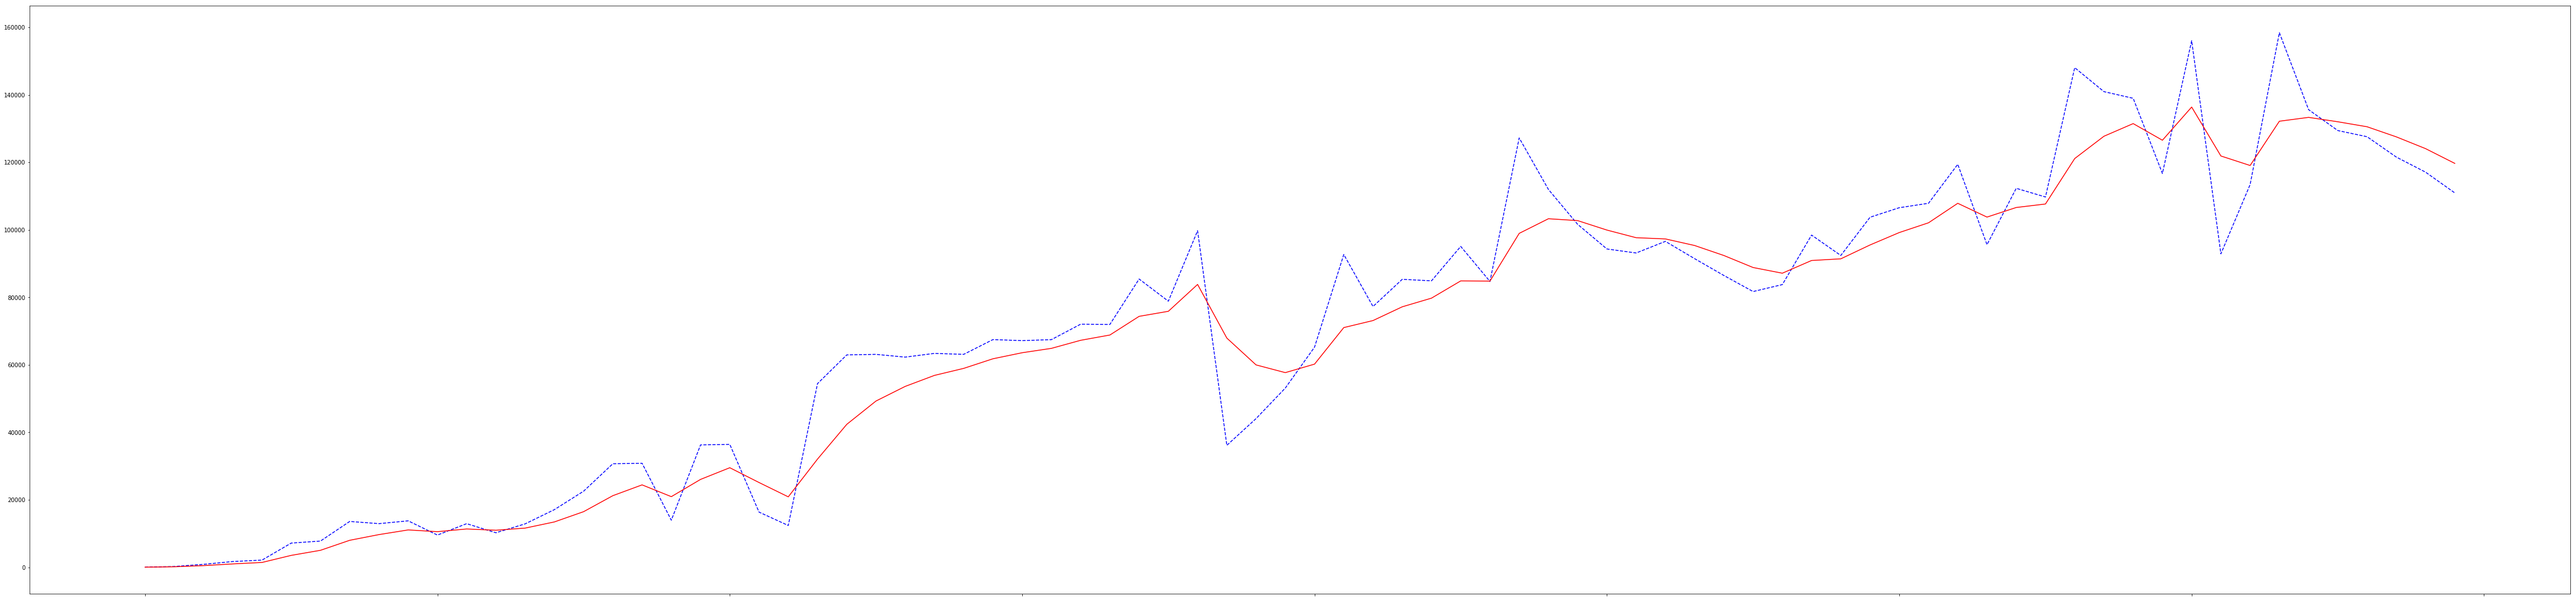

In [12]:
plt.figure(2, figsize=(80, 19))
base_data = week_data - c[1]*z 
base_data.plot(style='b--')
base_data.ewm(span=5).mean().plot(style='r')

#### 细粒度拟合 (roomtype, chapter)

In [37]:
historical_data.groupby(level=[1,2]).sum()

201916  201915  201914  201913  201912  201911   201910  \
roomtype chapter                                                            
2        1        7702.0  7673.0  6269.0  7445.0  8376.0  9478.0  13537.0   
         2        3923.0  4095.0  4198.0  5143.0  5752.0  6998.0   9872.0   
         3        3820.0  4122.0  4043.0  4982.0  5358.0  5959.0   7174.0   
         4        3575.0  3743.0  3512.0  4106.0  4127.0  4672.0   5596.0   
         5        2765.0  2888.0  2763.0  3267.0  3358.0  3674.0   4392.0   
         6        2357.0  2316.0  2369.0  2700.0  2640.0  2929.0   3451.0   
         7        4692.0  4803.0  4728.0  5476.0  5564.0  5954.0   7483.0   
         8        2876.0  2958.0  2977.0  3683.0  4044.0  4776.0   5898.0   
         9        2613.0  2637.0  2747.0  3359.0  3392.0  3527.0   4118.0   
         10       2403.0  2604.0  2566.0  2794.0  2726.0  2956.0   3524.0   
         11       2027.0  2014.0  2060.0  2190.0  2326.0  2619.0   3021.0   
         12       1705.0  1804.0  1783.0  2115.0  2151.0  2403.0   2808.0   
         13       3044.0  3167.0  3164.0  3495.0  3440.0  4012.0   5137.0   
         14       2076.0  2164.0  2329.0  2625.0  2922.0  3313.0   4202.0   
         15       1863.0  1954.0  2012.0  2238.0  2416.0  2573.0   3099.0   
         16       1583.0  1716.0  1832.0  1971.0  1942.0  2062.0   2446.0   
         17       1399.0  1383.0  1421.0  1554.0  1619.0  1766.0   2238.0   
         18       1098.0  1130.0  1299.0  1393.0  1463.0  1594.0   1902.0   
         19       1975.0  2042.0  2130.0  2276.0  2344.0  2499.0   3225.0   
         20       1330.0  1299.0  1471.0  1705.0  1879.0  2098.0   2631.0   
         21       1288.0  1276.0  1503.0  1548.0  1610.0  1562.0   1854.0   
         22       1036.0  1038.0  1154.0  1240.0  1181.0  1279.0   1557.0   
         23        850.0   866.0   969.0  1064.0  1055.0  1185.0   1307.0   
         24        783.0   829.0   831.0   891.0   902.0   980.0   1075.0   
         31       1236.0  1287.0  1411.0  1444.0  1528.0  1639.0   2023.0   
         32        876.0   969.0   929.0   987.0  1034.0  1189.0   1400.0   
         33          0.0     0.0     0.0     0.0     0.0     0.0      0.0   
         35        829.0   895.0   970.0  1113.0  1127.0  1235.0   1493.0   
         36        843.0   830.0   904.0   921.0   944.0  1008.0   1180.0   
         37        667.0   712.0   782.0   776.0   807.0   829.0    917.0   
...                  ...     ...     ...     ...     ...     ...      ...   
7        44         40.0    37.0    41.0    80.0    74.0    86.0     67.0   
         45         37.0    33.0    42.0    42.0    49.0    59.0     40.0   
         46         31.0    33.0    27.0    34.0    31.0    34.0     39.0   
         47         25.0    23.0    25.0    20.0    28.0    33.0     30.0   
         48         14.0    18.0    16.0    13.0    21.0    33.0     22.0   
         49         41.0    46.0    54.0    96.0    72.0    71.0     55.0   
         50         25.0    32.0    32.0    35.0    32.0    40.0     41.0   
         51         29.0    39.0    40.0    25.0    25.0    29.0      9.0   
         52         20.0    23.0    30.0    40.0    36.0    39.0     34.0   
         53         36.0    23.0    37.0    29.0    29.0    21.0      6.0   
         54         13.0    12.0    21.0    30.0    25.0    35.0     26.0   
         55         17.0    16.0    28.0    24.0    25.0    31.0     16.0   
         56         18.0    16.0    16.0    39.0    18.0    28.0     23.0   
         57         15.0    12.0    20.0    19.0    23.0    22.0     10.0   
         59         30.0    30.0    36.0    46.0    33.0    52.0     41.0   
         60         23.0    33.0    41.0    26.0    24.0    28.0     14.0   
         65         24.0    29.0    32.0    28.0    33.0    27.0     28.0   
         66         23.0    16.0    12.0    15.0    23.0    27.0     26.0   
         67         17.0    17.0    12.0    20.0    12.0    16.0     16.0   
         68   